<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/Task2_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn import datasets
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


# Load Fashion MNIST dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [13]:
y_iris = tf.keras.utils.to_categorical(y_iris, 3)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

X_train_fashion = X_train_fashion / 255.0
X_test_fashion = X_test_fashion / 255.0

X_train_fashion = X_train_fashion.reshape(-1, 28*28)
X_test_fashion = X_test_fashion.reshape(-1, 28*28)

y_train_fashion = tf.keras.utils.to_categorical(y_train_fashion, 10)
y_test_fashion = tf.keras.utils.to_categorical(y_test_fashion, 10)


In [20]:
# Build model for IRIS dataset
model_iris = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_iris.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for IRIS
])

model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_iris = model_iris.fit(X_train_iris, y_train_iris, epochs=50, batch_size=16, validation_data=(X_test_iris, y_test_iris))

# Evaluate on IRIS
loss_iris, accuracy_iris = model_iris.evaluate(X_test_iris, y_test_iris)

# Build model for MNIST Fashion dataset
model_fashion = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_fashion.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

model_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_fashion = model_fashion.fit(X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion))

# Evaluate on Fashion MNIST
loss_fashion, accuracy_fashion = model_fashion.evaluate(X_test_fashion, y_test_fashion)
print(f"Fashion MNIST Accuracy: {accuracy_fashion * 100:.2f}%")
print(f"IRIS Dataset Accuracy: {accuracy_iris * 100:.2f}%")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4169 - loss: 1.0122 - val_accuracy: 0.7000 - val_loss: 0.8874
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7773 - loss: 0.8770 - val_accuracy: 0.9333 - val_loss: 0.8178
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8998 - loss: 0.7984 - val_accuracy: 0.7333 - val_loss: 0.7552
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8071 - loss: 0.7713 - val_accuracy: 0.8333 - val_loss: 0.7135
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8579 - loss: 0.7014 - val_accuracy: 0.8667 - val_loss: 0.6493
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8752 - loss: 0.6440 - val_accuracy: 0.9333 - val_loss: 0.6067
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9030 - loss: 0.6202 - val_accuracy: 0.9667 - val_loss: 0.5774
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.5559 - val_accuracy: 0.9667 - val_loss: 0.5362
Epoch 9

In [21]:
# Hyperparameter tuning for IRIS dataset
model_iris_tuned = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_iris.shape[1],)),  # Tuning hidden layer size and activation
    layers.Dense(64, activation='relu'),  # Adding more neurons and layers
    layers.Dense(3, activation='softmax')  # 3 classes for IRIS
])

model_iris_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_iris_tuned = model_iris_tuned.fit(X_train_iris, y_train_iris, epochs=50, batch_size=16, validation_data=(X_test_iris, y_test_iris))

# Evaluate the tuned IRIS model
loss_iris_tuned, accuracy_iris_tuned = model_iris_tuned.evaluate(X_test_iris, y_test_iris)

# Hyperparameter tuning for Fashion MNIST dataset
model_fashion_tuned = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_fashion.shape[1],)),  # Larger hidden layers for complexity
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Additional hidden layer for more capacity
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

model_fashion_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_fashion_tuned = model_fashion_tuned.fit(X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion))

# Evaluate the tuned Fashion MNIST model
loss_fashion_tuned, accuracy_fashion_tuned = model_fashion_tuned.evaluate(X_test_fashion, y_test_fashion)
print(f"Tuned Fashion MNIST Accuracy: {accuracy_fashion_tuned * 100:.2f}%")
print(f"Tuned IRIS Dataset Accuracy: {accuracy_iris_tuned * 100:.2f}%")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3573 - loss: 1.2003 - val_accuracy: 0.6333 - val_loss: 0.9839
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6943 - loss: 0.9386 - val_accuracy: 0.8667 - val_loss: 0.8250
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6582 - loss: 0.8017 - val_accuracy: 0.7000 - val_loss: 0.6904
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6882 - loss: 0.6913 - val_accuracy: 0.9000 - val_loss: 0.6160
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8986 - loss: 0.5850 - val_accuracy: 0.8333 - val_loss: 0.5359
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8842 - loss: 0.5472 - val_accuracy: 0.9000 - val_loss: 0.4875
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8107 - loss: 0.5156 - val_accuracy: 0.8333 - val_loss: 0.4492
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8518 - loss: 0.4353 - val_accuracy: 1.0000 - val_loss: 0.4225
Epoch 9

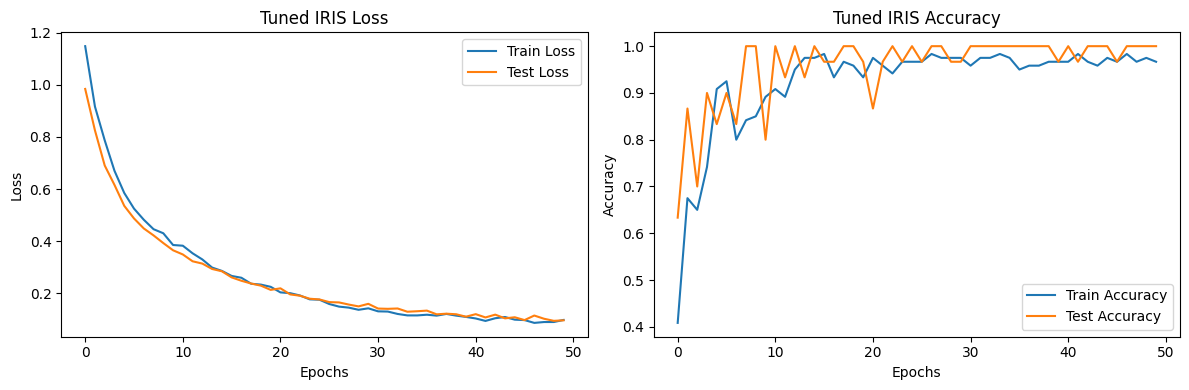

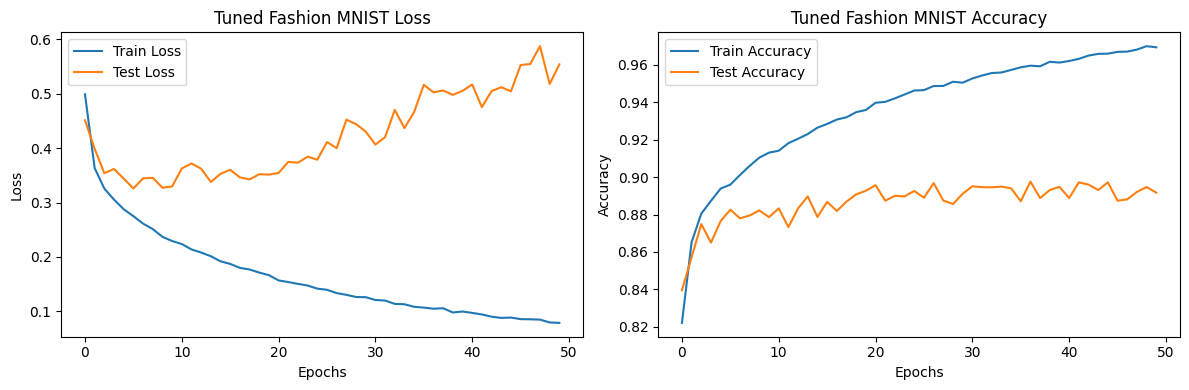

In [22]:
import matplotlib.pyplot as plt

# Plotting for tuned IRIS dataset
plt.figure(figsize=(12, 4))

# Loss plot for tuned IRIS
plt.subplot(1, 2, 1)
plt.plot(history_iris_tuned.history['loss'], label='Train Loss')
plt.plot(history_iris_tuned.history['val_loss'], label='Test Loss')
plt.title('Tuned IRIS Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for tuned IRIS
plt.subplot(1, 2, 2)
plt.plot(history_iris_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_iris_tuned.history['val_accuracy'], label='Test Accuracy')
plt.title('Tuned IRIS Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting for tuned Fashion MNIST dataset
plt.figure(figsize=(12, 4))

# Loss plot for tuned Fashion MNIST
plt.subplot(1, 2, 1)
plt.plot(history_fashion_tuned.history['loss'], label='Train Loss')
plt.plot(history_fashion_tuned.history['val_loss'], label='Test Loss')
plt.title('Tuned Fashion MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for tuned Fashion MNIST
plt.subplot(1, 2, 2)
plt.plot(history_fashion_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_fashion_tuned.history['val_accuracy'], label='Test Accuracy')
plt.title('Tuned Fashion MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelCheckpoint = ModelCheckpoint('model_best_weights.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history_fashion_with_callbacks = model_fashion.fit(
    X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion),
    callbacks=[modelCheckpoint, early_stop]
)
model_fashion.save('fashion_mnist_model.h5')


Epoch 1/50
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.0815
Epoch 1: val_loss improved from inf to 0.55768, saving model to model_best_weights.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9685 - loss: 0.0815 - val_accuracy: 0.8903 - val_loss: 0.5577
Epoch 2/50
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9699 - loss: 0.0819
Epoch 2: val_loss improved from 0.55768 to 0.53287, saving model to model_best_weights.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9698 - loss: 0.0820 - val_accuracy: 0.8938 - val_loss: 0.5329
Epoch 3/50
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.0826
Epoch 3: val_loss did not improve from 0.53287
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9686 - loss: 0.0826 - val_accuracy: 0.8889 - val_loss: 0.5429
Epoch 4/50
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.0821
Epoch 4: val_loss did not improve from 0.53287
938/938 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:


# Load the model later
loaded_model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Evaluate the loaded model
loss_loaded, accuracy_loaded = loaded_model.evaluate(X_test_fashion, y_test_fashion)
print(f"Loaded Model Accuracy: {accuracy_loaded * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8952 - loss: 0.5333
Loaded Model Accuracy: 89.38%
